## 下載 ta-lib 套件

In [3]:
#Colab安裝Talib的解法
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2024-10-15 08:20:01--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-10-15 08:20:01--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-10-15 08:20:01--  http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Resolving nchc.

## 與drive連線、read csv

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
file_path = '/content/drive/MyDrive/碩班進度/stockData/0050_2013-2024_adv.csv'
df = pd.read_csv(file_path)

#成交量(千股): Volume_Thousand_Shares
#成交筆數(筆): Number_of_Trades
#市值(百萬元): Market_Value_Million

column_mapping = {
    '證券代碼': 'Stock_Code',
    '年月日': 'Date',
    '開盤價(元)': 'Open',
    '最高價(元)': 'High',
    '最低價(元)': 'Low',
    '收盤價(元)': 'Close',
    '成交值(千元)': 'Turnover_Thousand',
    '成交量(千股)': 'Volume_Thousand_Shares',
    '成交筆數(筆)': 'Number_of_Trades',
    '市值(百萬元)': 'Market_Value_Million'
}

# 重命名欄位
df = df.rename(columns=column_mapping)

df['Date']=pd.to_datetime(df['Date'])
df['Open']=df['Open'].astype(float)
df['High']=df['High'].astype(float)
df['Low']=df['Low'].astype(float)
df['Close']=df['Close'].astype(float)
df=df.set_index('Date')
df=df.drop(columns=['Stock_Code'])

# 將資料按照日期升序排序（最遠的日期開始）
df = df.sort_index(ascending=True)

df.head()

,Open,High,Low,Close,Volume_Thousand_Shares,Turnover_Thousand,Number_of_Trades,Market_Value_Million
Date,,,,,,,,
2013-10-14,40.7062,40.7062,40.3925,40.4274,"6,623","385,079","1,463","86,043"
2013-10-15,40.7411,40.8456,40.6365,40.7759,"8,042","470,229","2,213","85,059"
2013-10-16,40.7411,40.8456,40.6016,40.6016,"7,029","410,205","1,844","84,696"
2013-10-17,40.8805,41.0199,40.7411,40.8108,"5,062","296,652","1,332","84,605"
2013-10-18,40.8805,41.1941,40.8805,41.1593,"14,818","872,614","3,248","83,261"


## Function：計算技術指標

In [78]:
#Index([', 'K',
#       'D', 'OSC', ',
#       , 'OBV'],
#      dtype='object')

#RSI 'SMA' 'EMA' 'Upper_Band', 'Middle_Band', 'Lower_Band''MACD', 'DIF', 'MACD_hist

import talib
import numpy as np

# 定義計算技術指標的函數
def add_technical_indicators(df):
    # 確保 Volume 欄位為浮點數
    df['Volume_Thousand_Shares'] = df['Volume_Thousand_Shares'].astype(str).str.replace(',', '').astype(float)
    # 計算 K 值和 D 值
    #df['K'], df['D'] = talib.STOCH(df['High'], df['Low'], df['Close'])

    # 計算 OSC (K - D)
    #df['OSC'] = df['K'] - df['D']
    # 計算 MACD, DIF, MACD histogram
    df['MACD'], df['DIF'], df['MACD_hist'] = talib.MACD(df['Close'],
                                                                fastperiod=12,
                                                                slowperiod=26,
                                                                signalperiod=9)

    # 計算 RSI (相對強弱指標)
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

    # 計算 Bollinger Bands (布林帶)
    df['Upper_Band'], df['Middle_Band'], df['Lower_Band'] = talib.BBANDS(df['Close'],
                                                                         timeperiod=20,
                                                                         nbdevup=2,
                                                                         nbdevdn=2,
                                                                         matype=0)

    # 計算 SMA (簡單移動平均線)
    df['SMA'] = talib.SMA(df['Close'], timeperiod=30)

    # 計算 EMA (指數移動平均線)
    df['EMA'] = talib.EMA(df['Close'], timeperiod=30)

    # 計算 OBV (累積能量線)
    #df['OBV'] = talib.OBV(df['Close'], df['Volume_Thousand_Shares'])


    return df

# 使用函數對 DataFrame 添加技術指標
df = add_technical_indicators(df)
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume_Thousand_Shares',
       'Turnover_Thousand', 'Number_of_Trades', 'Market_Value_Million', 'MACD',
       'DIF', 'MACD_hist', 'RSI', 'Upper_Band', 'Middle_Band', 'Lower_Band',
       'SMA', 'EMA'],
      dtype='object')

In [79]:
# 查找每一列中是否包含 NaN 值
nan_info = df.isna().sum()
print(nan_info)

Open                       0
High                       0
Low                        0
Close                      0
Volume_Thousand_Shares     0
Turnover_Thousand          0
Number_of_Trades           0
Market_Value_Million       0
MACD                      33
DIF                       33
MACD_hist                 33
RSI                       14
Upper_Band                19
Middle_Band               19
Lower_Band                19
SMA                       29
EMA                       29
dtype: int64


In [80]:
df = df.dropna()

## 將資料分成train_df、test_df

In [81]:
from sklearn.model_selection import train_test_split # Import train_test_split

# 將資料分為 80% 訓練集和 20% 測試集，保持時間順序
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

# 檢查切分後的資料形狀
print(f"Training data shape: {train_df.shape}")
print(f"Testing data shape: {test_df.shape}")

Training data shape: (2124, 17)
Testing data shape: (531, 17)


In [85]:
print(f"Train start: {train_df.index.min()}, Train end: {train_df.index.max()}")
print(f"Test start: {test_df.index.min()}, Test end: {test_df.index.max()}")

Train start: 2013-11-28 00:00:00, Train end: 2022-08-02 00:00:00
Test start: 2022-08-03 00:00:00, Test end: 2024-10-11 00:00:00


In [86]:
print(f"Training data shape after dropping NaN: {train_df.shape}")

Training data shape after dropping NaN: (2124, 17)


## Function：計算收益及顯示買賣點

In [87]:
import matplotlib.pyplot as plt

# 定義繪圖函數
def plot_buy_sell_points_with_profit_and_connections(df, start_date=None, end_date=None):
    if start_date and end_date:
        df_window = df.loc[start_date:end_date]
    else:
        df_window = df

    # 繪製收盤價折線圖
    plt.figure(figsize=(14, 7))
    plt.plot(df_window.index, df_window['Close'], label='Close Price', color='blue')

    # 獲取標記為買點和賣點的索引
    buy_points = df_window[df_window['Label'] == 0].index
    sell_points = df_window[df_window['Label'] == 2].index

    # 標註買點和賣點
    plt.scatter(buy_points, df_window.loc[buy_points, 'Close'], color='green', label='Buy Point (0)', marker='o')
    plt.scatter(sell_points, df_window.loc[sell_points, 'Close'], color='red', label='Sell Point (2)', marker='o')

    # 計算總收益並繪製連接線
    total_profit = 0
    positions = []

    for index, row in df_window.iterrows():
        if row['Label'] == 0:
            positions.append((index, row['Close']))
        elif row['Label'] == 2 and positions:
            buy_index, buy_price = positions.pop(0)
            sell_price = row['Close']
            profit = sell_price - buy_price
            total_profit += profit

            plt.plot([buy_index, index], [buy_price, sell_price], color='gray', linestyle='--', linewidth=1)
            mid_index = buy_index + (index - buy_index) / 2
            mid_price = buy_price + (sell_price - buy_price) / 2
            profit_label = f'{profit:.2f}'
            plt.text(mid_index, mid_price, profit_label, color='black', fontsize=9, ha='center')

    plt.title(f'Close Prices with Buy (0) and Sell (2) Points\n(Period: {start_date} to {end_date})\nTotal Profit: {total_profit:.2f}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()

    plt.show()
    print(f'Total profit from {start_date} to {end_date} is: {total_profit:.2f}')


## 將training data 以「極值」的方式選擇買賣點Label

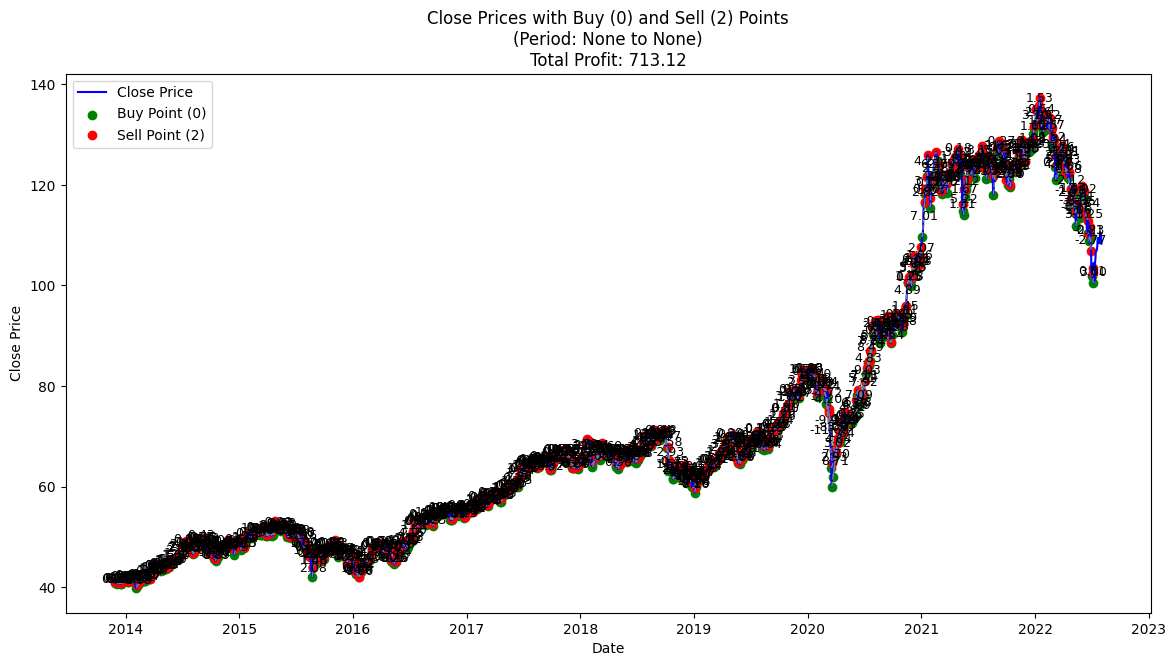

Total profit from None to None is: 713.12


In [88]:
from scipy.signal import argrelextrema
# 定義標註函數，以局部極值尋找最適合的買入和賣出點
def label_daily_data_with_extrema(df, window_size=54, sub_window_size=6):
    labels = [1] * len(df)  # 初始化所有標籤為 1

    for i in range(0, len(df) - window_size + 1, window_size):
        group = df.iloc[i:i + window_size]

        for j in range(0, window_size, sub_window_size):
            sub_group = group.iloc[j:j + sub_window_size]

            if len(sub_group) < sub_window_size:
                continue

            # 使用局部極小值和極大值來標註買入和賣出點
            min_index = sub_group['Close'].iloc[argrelextrema(sub_group['Close'].values, np.less_equal, order=1)].index
            max_index = sub_group['Close'].iloc[argrelextrema(sub_group['Close'].values, np.greater_equal, order=1)].index

            for idx in min_index:
                labels[df.index.get_loc(idx)] = 0  # 標記買入點為 0
            for idx in max_index:
                labels[df.index.get_loc(idx)] = 2  # 標記賣出點為 2

    df['Label'] = labels
    return df

# 使用標註函數對訓練資料進行標註
train_df = label_daily_data_with_extrema(train_df)
train_df.head()
plot_buy_sell_points_with_profit_and_connections(train_df, start_date=None, end_date=None)

## 將training data以「格蘭碧八大法則」的方式選擇買賣點Label
https://www.oanda.com/bvi-ft/lab-education/technical_analysis/moving_average-granvilles_law/

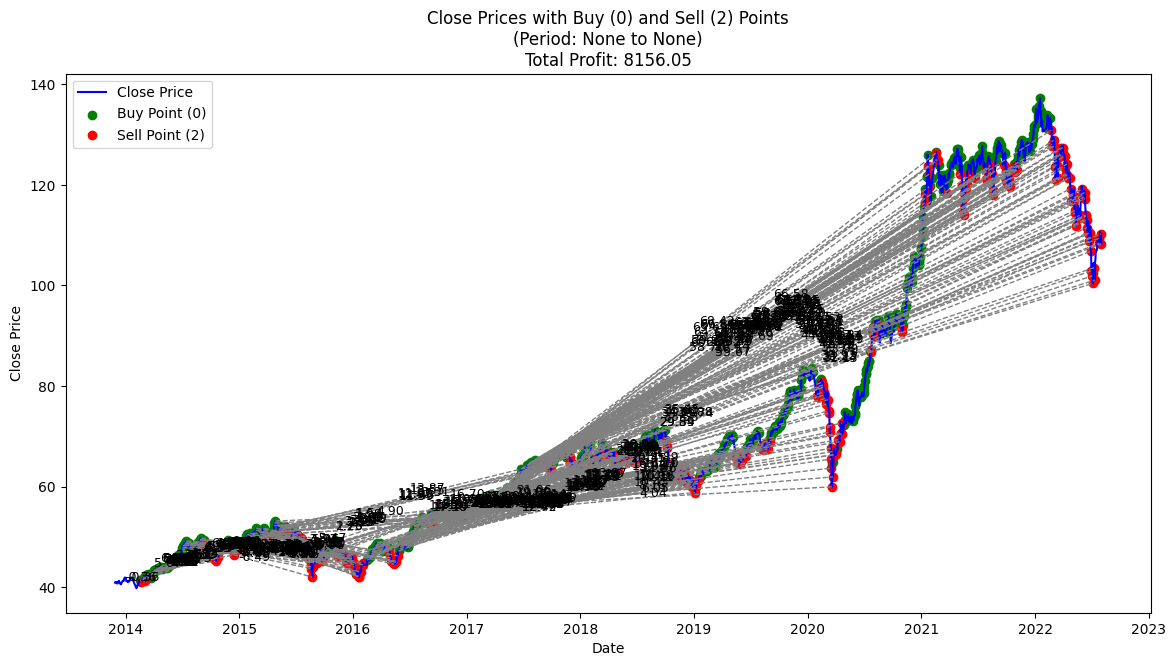

Total profit from None to None is: 8156.05


In [89]:
# 定義標註函數，根據格蘭碧八大法則進行買賣點標記
def label_granville_rules(df):
    # 計算移動平均線（SMA）
    df['SMA'] = talib.SMA(df['Close'], timeperiod=50)
    labels = [1] * len(df)  # 初始化所有標籤為 1

    for i in range(1, len(df)):
        if pd.isna(df['SMA'].iloc[i]):
            continue

        # 格蘭碧法則 - 買入信號
        # 1. 突破
        if df['SMA'].iloc[i-1] >= df['SMA'].iloc[i] and df['SMA'].iloc[i] < df['Close'].iloc[i] and df['Close'].iloc[i-1] < df['SMA'].iloc[i]:
            labels[i] = 0  # 買入點標記為 0
        # 2. 假跌破
        elif df['Close'].iloc[i-1] < df['SMA'].iloc[i-1] and df['Close'].iloc[i] > df['SMA'].iloc[i] and df['SMA'].iloc[i] > df['SMA'].iloc[i-1]:
            labels[i] = 0  # 買入點標記為 0
        # 3. 支撐
        elif df['Close'].iloc[i] > df['SMA'].iloc[i] and df['Close'].iloc[i-1] > df['SMA'].iloc[i-1] and df['Close'].iloc[i] > df['Close'].iloc[i-1]:
            labels[i] = 0  # 買入點標記為 0
        # 4. 抄底
        elif df['Close'].iloc[i] < df['SMA'].iloc[i] * 0.9 and df['Close'].iloc[i] > df['Close'].iloc[i-1]:
            labels[i] = 0  # 買入點標記為 0

        # 格蘭碧法則 - 賣出信號
        # 5. 跌破
        elif df['SMA'].iloc[i-1] <= df['SMA'].iloc[i] and df['SMA'].iloc[i] > df['Close'].iloc[i] and df['Close'].iloc[i-1] > df['SMA'].iloc[i]:
            labels[i] = 2  # 賣出點標記為 2
        # 6. 假突破
        elif df['Close'].iloc[i-1] > df['SMA'].iloc[i-1] and df['Close'].iloc[i] < df['SMA'].iloc[i] and df['SMA'].iloc[i] < df['SMA'].iloc[i-1]:
            labels[i] = 2  # 賣出點標記為 2
        # 7. 反壓
        elif df['Close'].iloc[i] < df['SMA'].iloc[i] and df['Close'].iloc[i-1] < df['SMA'].iloc[i-1] and df['Close'].iloc[i] < df['Close'].iloc[i-1]:
            labels[i] = 2  # 賣出點標記為 2
        # 8. 反轉
        elif df['Close'].iloc[i] > df['SMA'].iloc[i] * 1.1 and df['Close'].iloc[i] < df['Close'].iloc[i-1]:
            labels[i] = 2  # 賣出點標記為 2

    df['Label'] = labels
    return df

# 使用標註函數對訓練資料進行標註
train_df = label_granville_rules(train_df)
train_df.head()
plot_buy_sell_points_with_profit_and_connections(train_df, start_date=None, end_date=None)

## 將training data 以「原作者」的方式選擇買賣點Label

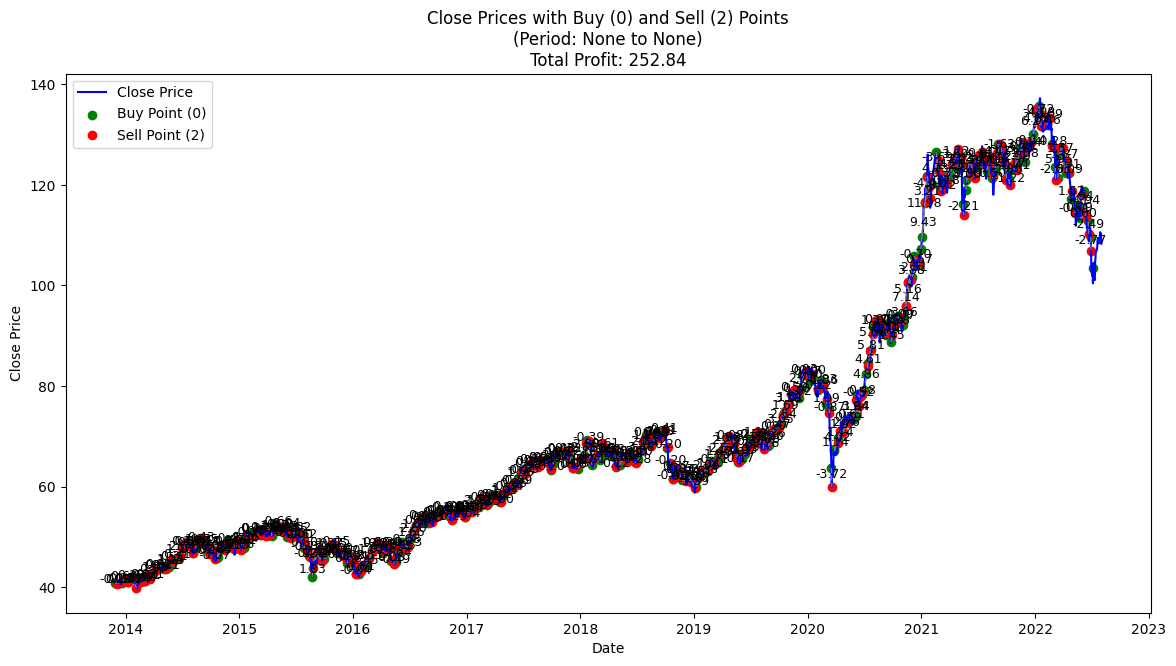

Total profit from None to None is: 252.84


In [90]:
!pip install TA-Lib
import talib
import numpy as np
import pandas as pd


# 定義標註函數
def label_daily_data(df, window_size=54, sub_window_size=6):
    # Calculate DIF if it doesn't exist
    if 'DIF' not in df.columns:
        df['DIF'] = talib.MACD(df['Close'])[0]  # Assuming you want to use MACD for DIF

    labels = [1] * len(df)  # 初始化所有標籤為 1

    for i in range(0, len(df) - window_size + 1, window_size):
        group = df.iloc[i:i + window_size]

        for j in range(0, window_size, sub_window_size):
            sub_group = group.iloc[j:j + sub_window_size]

            if len(sub_group) < sub_window_size:
                continue

            if sub_group['DIF'].isnull().all():
                continue

            min_index = sub_group['DIF'].idxmin()
            max_index = sub_group['DIF'].idxmax()

            if min_index == max_index:
                continue

            labels[df.index.get_loc(min_index)] = 0
            labels[df.index.get_loc(max_index)] = 2

    df['Label'] = labels
    return df

# 使用標註函數對訓練資料進行標註
train_df = label_daily_data(train_df)
train_df.head()
plot_buy_sell_points_with_profit_and_connections(train_df, start_date=None, end_date=None)

## 查看Label平衡與否

Label distribution in the dataset:
Label 0: 351 samples
Label 1: 1422 samples
Label 2: 351 samples


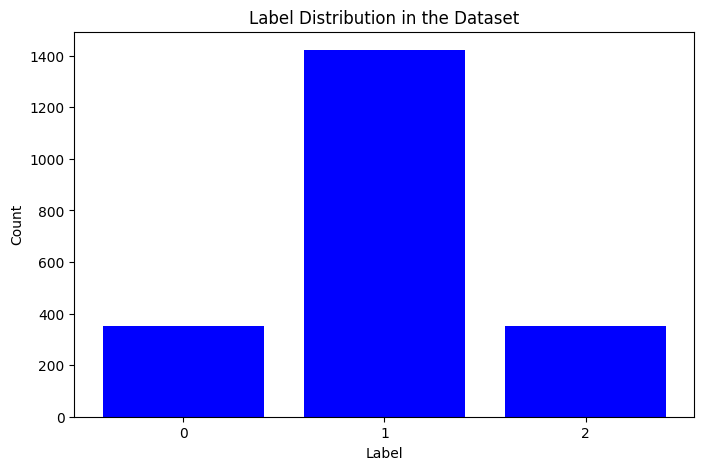

In [91]:
# Assuming y is the label column from train_df
y = train_df['Label']

# Calculate label distribution
unique, counts = np.unique(y, return_counts=True)
label_distribution = dict(zip(unique, counts))

# Print label distribution
print("Label distribution in the dataset:")
for label, count in label_distribution.items():
    print(f"Label {label}: {count} samples")

# Visualize label distribution
plt.figure(figsize=(8, 5))
plt.bar(label_distribution.keys(), label_distribution.values(), color='blue')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution in the Dataset')
plt.xticks(list(label_distribution.keys()))
plt.show()


# Deep Learning Function

## Function：confusion_matrix

In [92]:
## Function：confusion_matrix
def confusion_matrix(y_true, y_pred):
  # Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

  # Classification Report
  print("Classification Report:")
  print(classification_report(y_test, y_pred))

## Function：accuracy_plot

In [93]:
def accuracy_plot(history):
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    plt.show()

## Function：plot_buy_sell_points_with_profit

In [94]:
# Plot Buy/Sell Points and Calculate Total Profit
def plot_buy_sell_points_with_profit(df, y_true, y_pred, start_date=None, end_date=None,window_size=9):
    if start_date and end_date:
        df = df.loc[start_date:end_date]
        # Get the integer positions of the start and end dates in the original y_true array
        start_index = df.index[0]
        end_index = df.index[-1]

        # Find the corresponding indices in y_true/y_pred (assuming they align with the original df)
        start_pos = df.index.get_loc(start_index)
        end_pos = df.index.get_loc(end_index) + 1 # +1 to include the end index

        y_true = y_true[start_pos:end_pos] # Use integer positions for slicing
        y_pred = y_pred[start_pos:end_pos] # Use integer positions for slicing

    else:
        df = df.iloc[window_size:len(y_true) + window_size] # Access window_size

    df['True_Label'] = y_true
    df['Predicted_Label'] = y_pred

    buy_points = df[df['Predicted_Label'] == 0].index
    sell_points = df[df['Predicted_Label'] == 2].index

    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.scatter(buy_points, df.loc[buy_points, 'Close'], color='green', label='Buy Point', marker='o')
    plt.scatter(sell_points, df.loc[sell_points, 'Close'], color='red', label='Sell Point', marker='o')

    total_profit = 0
    positions = []
    for index, row in df.iterrows():
        if row['Predicted_Label'] == 0:
            positions.append((index, row['Close']))
        elif row['Predicted_Label'] == 2 and positions:
            buy_index, buy_price = positions.pop(0)
            sell_price = row['Close']
            profit = sell_price - buy_price
            total_profit += profit
            plt.plot([buy_index, index], [buy_price, sell_price], color='gray', linestyle='--', linewidth=1)

    plt.title(f'Close Prices with Buy and Sell Points\nTotal Profit: {total_profit:.2f}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

## Function：CNN_model

In [98]:
from tensorflow.keras.layers import LSTM, Dropout, Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # Import StandardScaler from sklearn.preprocessing
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix # Import confusion_matrix with an alias
import seaborn as sns
from tensorflow.keras.layers import LSTM, Dropout, Dense, Conv1D, MaxPooling1D, Flatten # Import Conv1D, MaxPooling1D and Flatten

def CNN_model(train_df,features=['Open', 'High', 'Low', 'Close', 'Volume_Thousand_Shares', 'Number_of_Trades', 'Market_Value_Million']):
  X = train_df[features]
  y = train_df['Label']

  # Replace NaN and Inf values
  X.replace([np.inf, -np.inf], np.nan, inplace=True)

  # Convert columns with commas to numeric
  for col in features:  # Iterate through relevant columns
      # Check if the column has object (string) dtype before applying str methods
      if X[col].dtype == object:
          X[col] = X[col].str.replace(',', '', regex=False).astype(float)  # Remove commas and convert to float
      else:
          # If not object dtype, assume it's already numeric or can be directly converted
          X[col] = X[col].astype(float)

  X.fillna(X.median(), inplace=True) # Now fill NaN with median after conversion

  # Convert features to numpy array
  X = X.values
  y = y.values

  # Handle imbalance using RandomOverSampler
  #ros = RandomOverSampler(random_state=42)
  #X_resampled, y_resampled = ros.fit_resample(X, y)

  # Standardize the input data
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_resampled)

  # Step 4: Create Sequences for Time Series
  window_size = 9
  num_features = len(features)

  def create_sequences(data, labels, window_size):
      X_seq, y_seq = [], []
      for i in range(len(data) - window_size):
          X_seq.append(data[i:i + window_size])
          y_seq.append(labels[i + window_size])
      return np.array(X_seq), np.array(y_seq)

  X_seq, y_seq = create_sequences(X_scaled, y_resampled, window_size)

  # Step 5: Split Training and Testing Data
  X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

  # Step 6: Build and Train the CNN Model
  model = Sequential()
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, num_features)))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dropout(0.2))
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(3, activation='softmax'))  # 3 classes for labels 0, 1, 2


  # Compile the model
  optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  # Train the model with Early Stopping
  early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
  history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

  # Step 7: Evaluate the Model
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print(f"Test accuracy: {test_acc:.2f}")

  # Predict on Test Set
  y_pred_prob = model.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  # Calculate Mean Squared Error
  mse = mean_squared_error(y_test, y_pred)
  print(f"Test MSE: {mse:.2f}")


  # Confusion Matrix
  cm = sklearn_confusion_matrix(y_test, y_pred) # Call the correct confusion_matrix
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

  accuracy_plot(history)

  # Buy and Sell plot
  plot_buy_sell_points_with_profit(train_df, y_test, y_pred)


## Function：LSTM_model

In [104]:
from tensorflow.keras.layers import LSTM, Dropout, Dense
import matplotlib.pyplot as plt

def LSTM_model(train_df,features=['Open', 'High', 'Low', 'Close', 'Volume_Thousand_Shares', 'Number_of_Trades', 'Market_Value_Million']):
  # Step 3: Split Data and Handle Imbalance
  features = ['Open', 'High', 'Low', 'Close', 'Volume_Thousand_Shares', 'Number_of_Trades', 'Market_Value_Million']
  X = train_df[features]
  y = train_df['Label']

  # Replace NaN and Inf values
  X.replace([np.inf, -np.inf], np.nan, inplace=True)

  # Convert columns with commas to numeric
  for col in features:
      # Check if the column has object (string) dtype before applying str methods
      if X[col].dtype == object:
          X[col] = X[col].str.replace(',', '', regex=False).astype(float)  # Remove commas and convert to float
      else:
          # If not object dtype, assume it's already numeric or can be directly converted
          X[col] = X[col].astype(float)  # Convert to numeric if possible

  X.fillna(X.median(), inplace=True) # Now fill NaN with median after conversion

  # Convert features to numpy array
  X = X.values
  y = y.values

  # Handle imbalance using RandomOverSampler
  ros = RandomOverSampler(random_state=42)
  X_resampled, y_resampled = ros.fit_resample(X, y)

  # Standardize the input data
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_resampled)

  # Step 4: Create Sequences for Time Series
  window_size = 9
  num_features = len(features)

  def create_sequences(data, labels, window_size):
      X_seq, y_seq = [], []
      for i in range(len(data) - window_size):
          X_seq.append(data[i:i + window_size])
          y_seq.append(labels[i + window_size])
      return np.array(X_seq), np.array(y_seq)

  X_seq, y_seq = create_sequences(X_scaled, y_resampled, window_size)

  # Step 5: Split Training and Testing Data
  X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

  # Step 6: Build and Train the LSTM Model
  model = Sequential()
  model.add(LSTM(64, activation='relu', input_shape=(window_size, num_features), return_sequences=True))
  model.add(Dropout(0.2))
  model.add(LSTM(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(3, activation='softmax'))  # 3 classes for labels 0, 1, 2

  # Compile the model
  optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  # Train the model with Early Stopping
  early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
  history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

  # Step 7: Evaluate the Model
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print(f"Test accuracy: {test_acc:.2f}")

  # Predict on Test Set
  y_pred_prob = model.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  # Calculate Mean Squared Error
  mse = mean_squared_error(y_test, y_pred)
  print(f"Test MSE: {mse:.2f}")


  # Confusion Matrix
  cm = sklearn_confusion_matrix(y_test, y_pred) # Call the correct confusion_matrix
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

  accuracy_plot(history)

  # Buy and Sell plot
  plot_buy_sell_points_with_profit(train_df, y_test, y_pred)

#Train data (CNN、LSTM、CNN-LSTM)

## CNN less features

<ipython-input-98-954d821faed8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-98-954d821faed8>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(float)
<ipython-input-98-954d821faed8>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3267 - loss: 1.1536 - val_accuracy: 0.4049 - val_loss: 1.0280
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4117 - loss: 1.0298 - val_accuracy: 0.5329 - val_loss: 0.9608
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5254 - loss: 0.9536 - val_accuracy: 0.5458 - val_loss: 0.9166
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5428 - loss: 0.9306 - val_accuracy: 0.5563 - val_loss: 0.8884
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5520 - loss: 0.9061 - val_accuracy: 0.5681 - val_loss: 0.8673
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5688 - loss: 0.8853 - val_accuracy: 0.5728 - val_loss: 0.8537
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5511 - loss: 0.8866 - val_accuracy: 0.5810 - val_loss: 0.8444
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5543 - loss: 0.8746 - val_accu

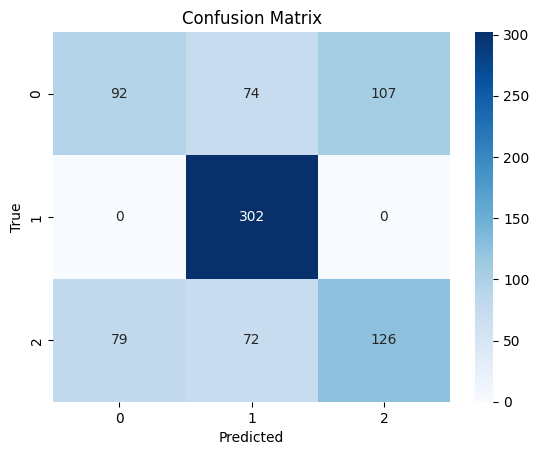

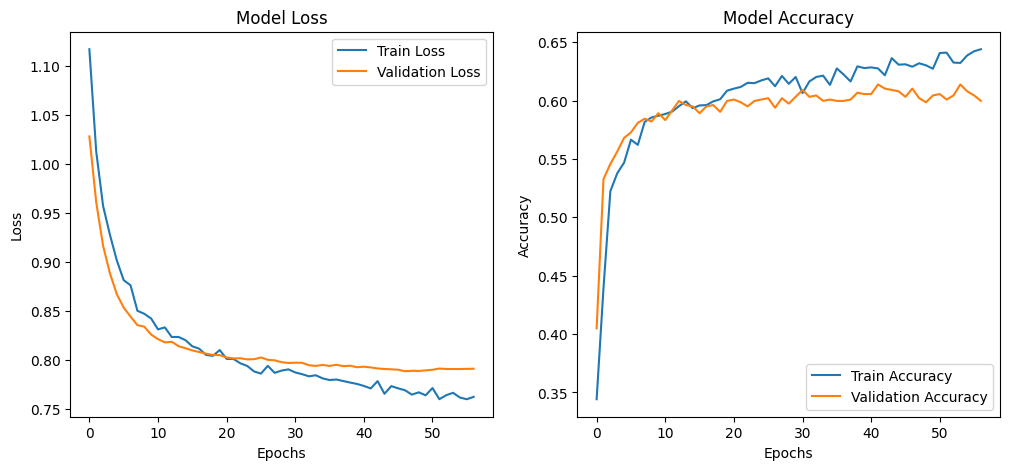

<ipython-input-94-8c7c4c504a15>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['True_Label'] = y_true
<ipython-input-94-8c7c4c504a15>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Label'] = y_pred


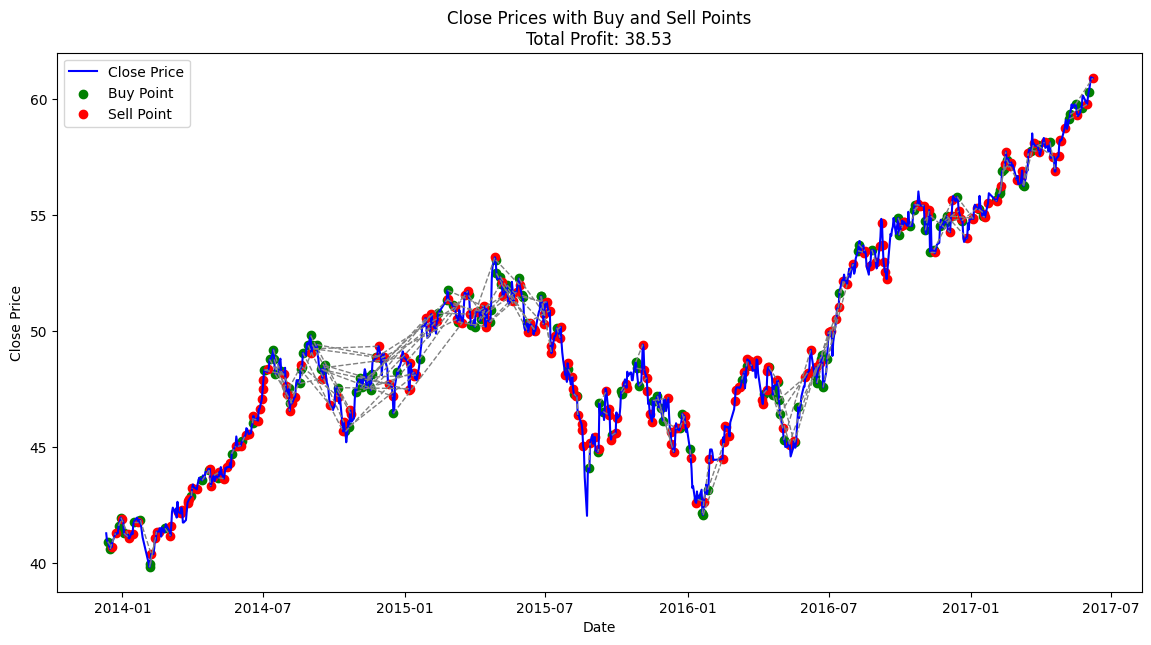

In [100]:
CNN_model(train_df,['Open', 'High', 'Low', 'Close', 'Volume_Thousand_Shares', 'Number_of_Trades', 'Market_Value_Million'])

## CNN more features

Epoch 1/100


<ipython-input-98-954d821faed8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-98-954d821faed8>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(float)
<ipython-input-98-954d821faed8>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3636 - loss: 1.2341 - val_accuracy: 0.5094 - val_loss: 0.9934
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4448 - loss: 1.0340 - val_accuracy: 0.5892 - val_loss: 0.9148
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5241 - loss: 0.9429 - val_accuracy: 0.6080 - val_loss: 0.8757
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5510 - loss: 0.9108 - val_accuracy: 0.6174 - val_loss: 0.8480
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5728 - loss: 0.8794 - val_accuracy: 0.6256 - val_loss: 0.8289
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5968 - loss: 0.8584 - val_accuracy: 0.6420 - val_loss: 0.8139
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6059 - loss: 0.8419 - val_accuracy: 0.6502 - val_loss: 0.7999
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6303 - loss: 0.8167 - val_accuracy: 0.6620

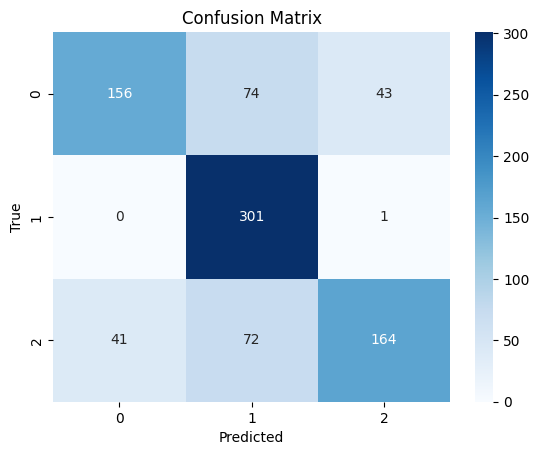

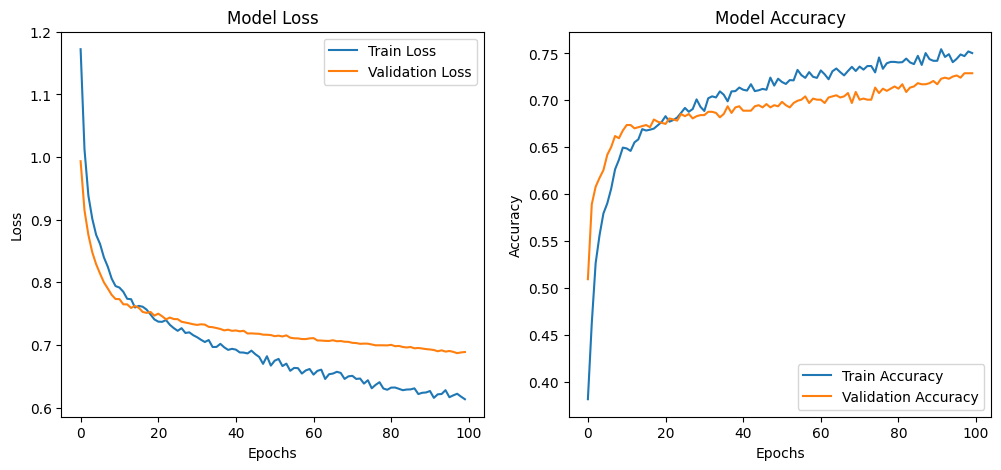

<ipython-input-94-8c7c4c504a15>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['True_Label'] = y_true
<ipython-input-94-8c7c4c504a15>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Label'] = y_pred


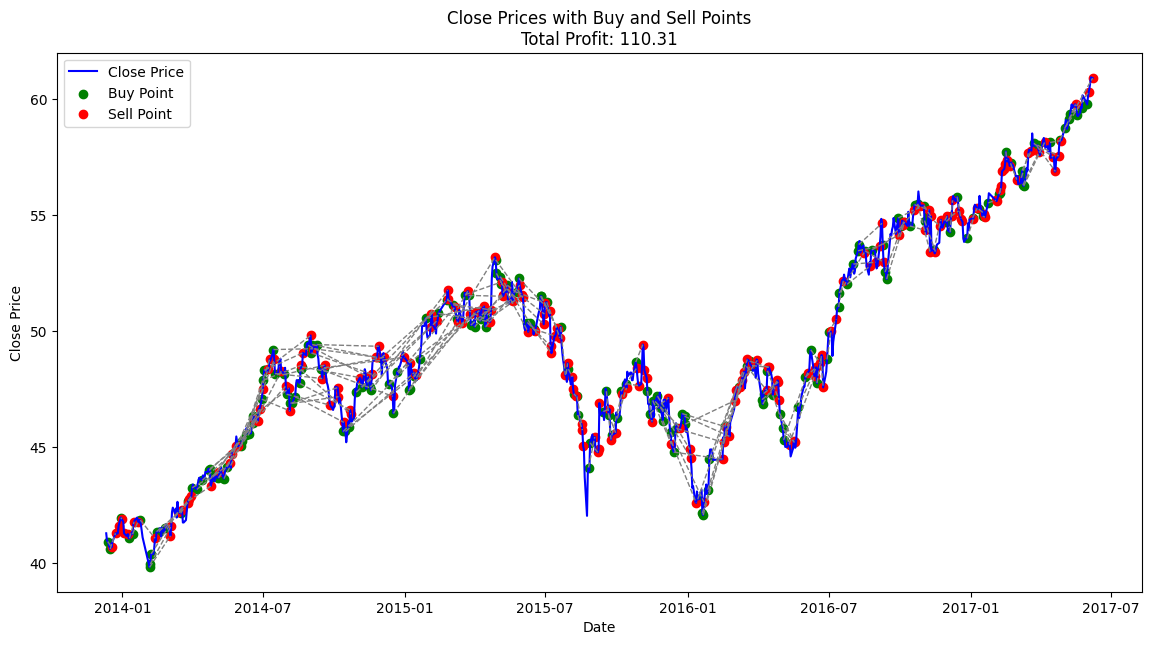

In [101]:
CNN_model(train_df,['Open', 'High', 'Low', 'Close', 'Volume_Thousand_Shares',
       'Turnover_Thousand', 'Number_of_Trades', 'Market_Value_Million', 'MACD',
       'DIF', 'MACD_hist', 'RSI', 'Upper_Band', 'Middle_Band', 'Lower_Band',
       'SMA', 'EMA'])

## LSTM less features

Epoch 1/100


<ipython-input-104-745a0ccf61d7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-104-745a0ccf61d7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(float)  # Convert to numeric if possible
<ipython-input-104-745a0ccf61d7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.3667 - loss: 1.0945 - val_accuracy: 0.5399 - val_loss: 1.0720
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4885 - loss: 1.0653 - val_accuracy: 0.5446 - val_loss: 0.9894
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5210 - loss: 0.9714 - val_accuracy: 0.5622 - val_loss: 0.8753
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5240 - loss: 0.8962 - val_accuracy: 0.5822 - val_loss: 0.8515
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5469 - loss: 0.8690 - val_accuracy: 0.6009 - val_loss: 0.8360
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5678 - loss: 0.8741 - val_accuracy: 0.6138 - val_loss: 0.8240
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5802 - loss: 0.8470 - val_accuracy: 0.5986 - val_loss: 0.8194
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5929 - loss: 0.8300 - val_accuracy

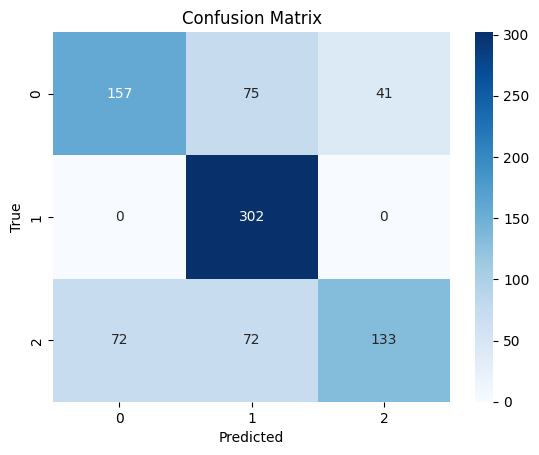

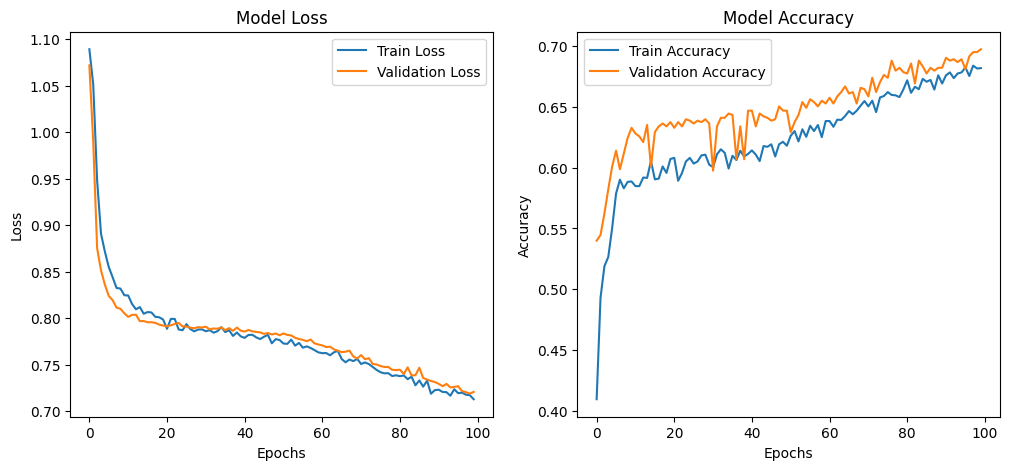

<ipython-input-94-8c7c4c504a15>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['True_Label'] = y_true
<ipython-input-94-8c7c4c504a15>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Label'] = y_pred


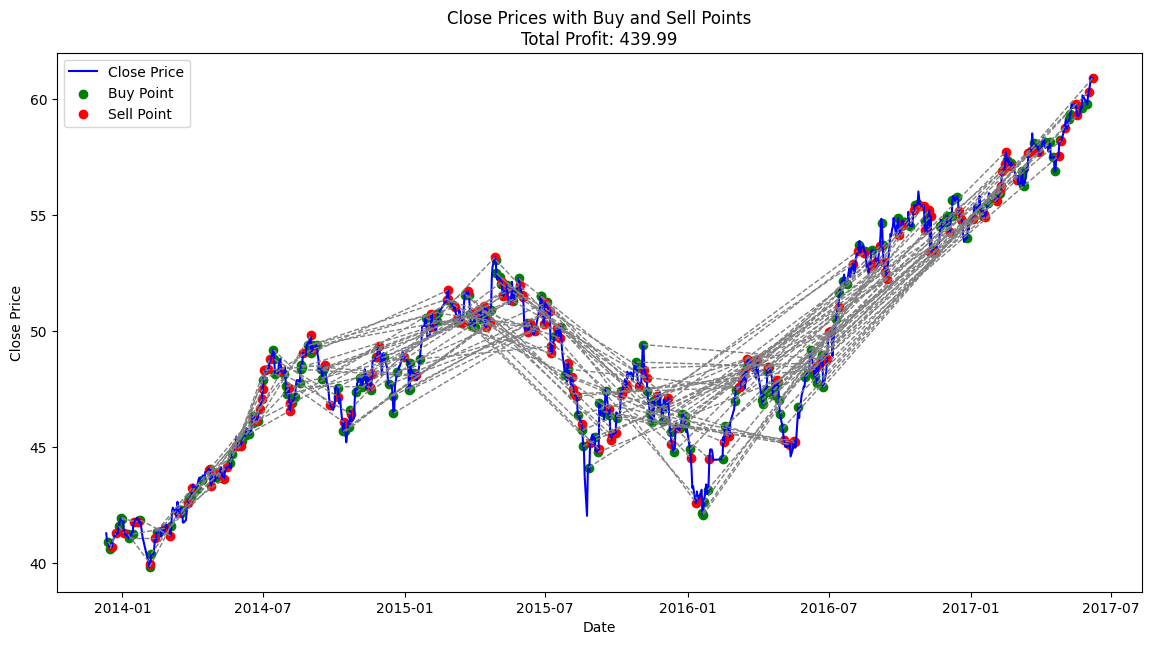

In [105]:
LSTM_model(train_df)

## LSTM more features

<ipython-input-104-745a0ccf61d7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-104-745a0ccf61d7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(float)  # Convert to numeric if possible
<ipython-input-104-745a0ccf61d7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.3902 - loss: 1.0939 - val_accuracy: 0.5376 - val_loss: 1.0779
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4958 - loss: 1.0729 - val_accuracy: 0.5563 - val_loss: 1.0236
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5243 - loss: 1.0002 - val_accuracy: 0.5646 - val_loss: 0.9008
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5032 - loss: 0.9264 - val_accuracy: 0.5657 - val_loss: 0.8648
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5498 - loss: 0.8862 - val_accuracy: 0.5798 - val_loss: 0.8469
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5504 - loss: 0.8753 - val_accuracy: 0.5786 - val_loss: 0.8380
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5649 - loss: 0.8649 - val_accuracy: 0.5904 - val_loss: 0.8299
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5683 - loss: 0.8529 -

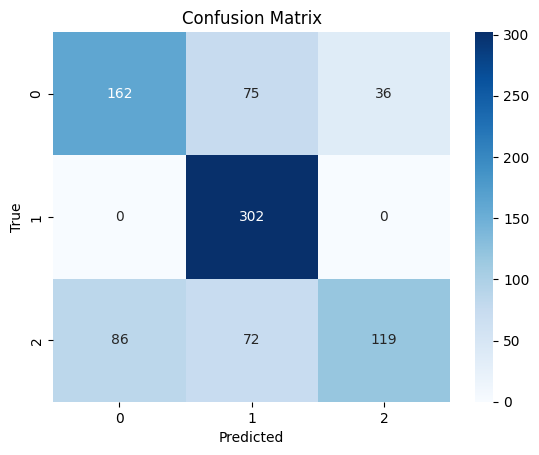

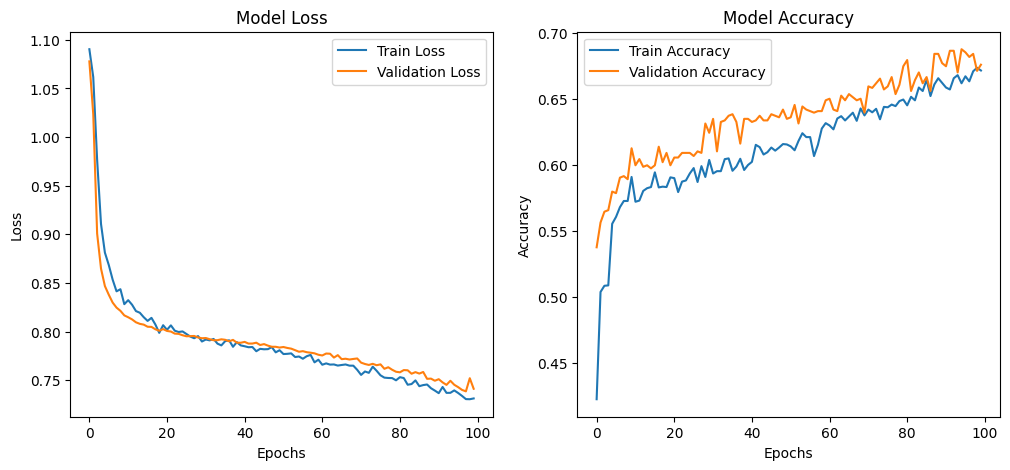

<ipython-input-94-8c7c4c504a15>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['True_Label'] = y_true
<ipython-input-94-8c7c4c504a15>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Label'] = y_pred


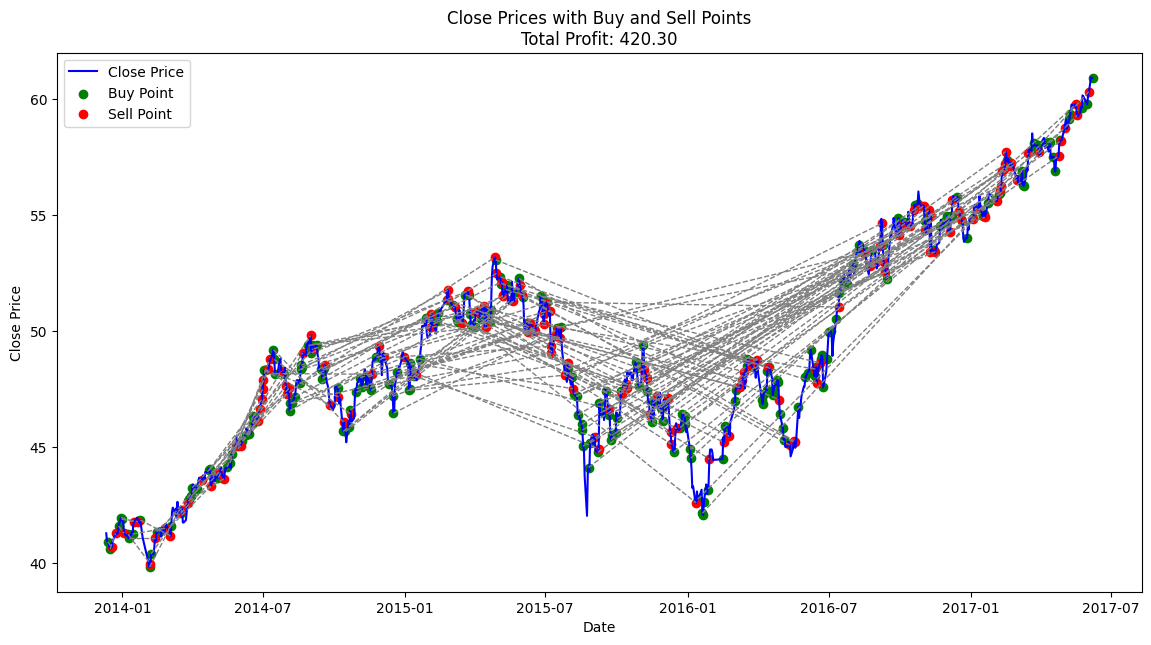

In [106]:
LSTM_model(train_df,['Open', 'High', 'Low', 'Close', 'Volume_Thousand_Shares',
       'Turnover_Thousand', 'Number_of_Trades', 'Market_Value_Million', 'MACD',
       'DIF', 'MACD_hist', 'RSI', 'Upper_Band', 'Middle_Band', 'Lower_Band',
       'SMA', 'EMA'])

## CNN-LSTM less features

In [260]:
# Step 3: Split Data and Handle Imbalance
features = ['Open', 'High', 'Low', 'Close', 'Volume_Thousand_Shares', 'Number_of_Trades', 'Market_Value_Million']
X = train_df[features]
y = train_df['Label']

# Replace NaN and Inf values
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert columns to numeric before calculating median
for col in features:
    if X[col].dtype == object:
        X[col] = X[col].str.replace(',', '', regex=True).astype(float)

# Now, fill NaN values with median
X.fillna(X.median(), inplace=True)

# Convert features to numpy array
X = X.values
y = y.values

# Handle imbalance using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Standardize the input data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Step 4: Create Sequences for Time Series
window_size = 9
num_features = len(features)

def create_sequences(data, labels, window_size):
    X_seq, y_seq = [], []
    for i in range(len(data) - window_size):
        X_seq.append(data[i:i + window_size])
        y_seq.append(labels[i + window_size])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y_resampled, window_size)

# Step 5: Split Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Step 6: Build and Train the CNN-LSTM Model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, num_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # 3 classes for labels 0, 1, 2

# Compile the model
optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

# Predict on Test Set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")


<ipython-input-260-e4cfdabe8558>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-260-e4cfdabe8558>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].str.replace(',', '', regex=True).astype(float)
<ipython-input-260-e4cfdabe8558>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.3342 - loss: 1.0962 - val_accuracy: 0.3243 - val_loss: 1.0895
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3391 - loss: 1.0763 - val_accuracy: 0.3373 - val_loss: 1.0231
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4196 - loss: 0.9822 - val_accuracy: 0.5920 - val_loss: 0.9036
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5840 - loss: 0.8825 - val_accuracy: 0.6073 - val_loss: 0.8373
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5800 - loss: 0.8540 - val_accuracy: 0.5979 - val_loss: 0.8158
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5724 - loss: 0.8442 - val_accuracy: 0.6014 - val_loss: 0.8124
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5750 - loss: 0.8302 - val_accuracy: 0.5908 - val_loss: 0.8085
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5866 - loss: 0.8174 - v

### confusion matrix

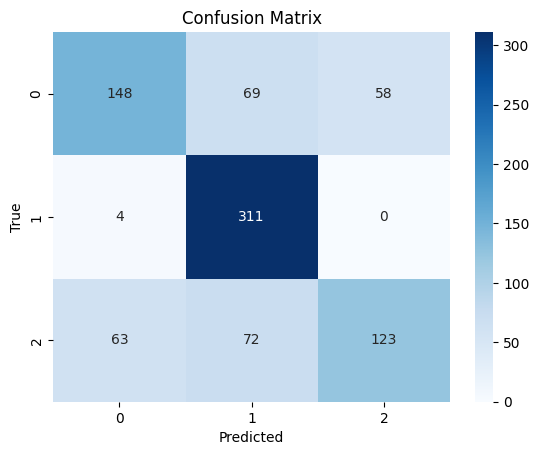

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.54      0.60       275
           1       0.69      0.99      0.81       315
           2       0.68      0.48      0.56       258

    accuracy                           0.69       848
   macro avg       0.69      0.67      0.66       848
weighted avg       0.69      0.69      0.67       848



In [261]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

### loss plot

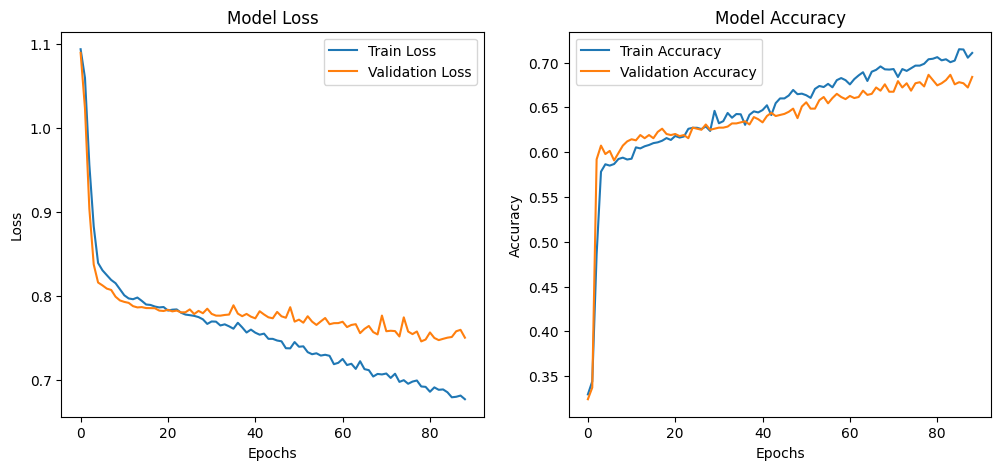

In [262]:
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.show()

### buy and sell point

<ipython-input-263-4380c0eff667>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['True_Label'] = y_true
<ipython-input-263-4380c0eff667>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Label'] = y_pred


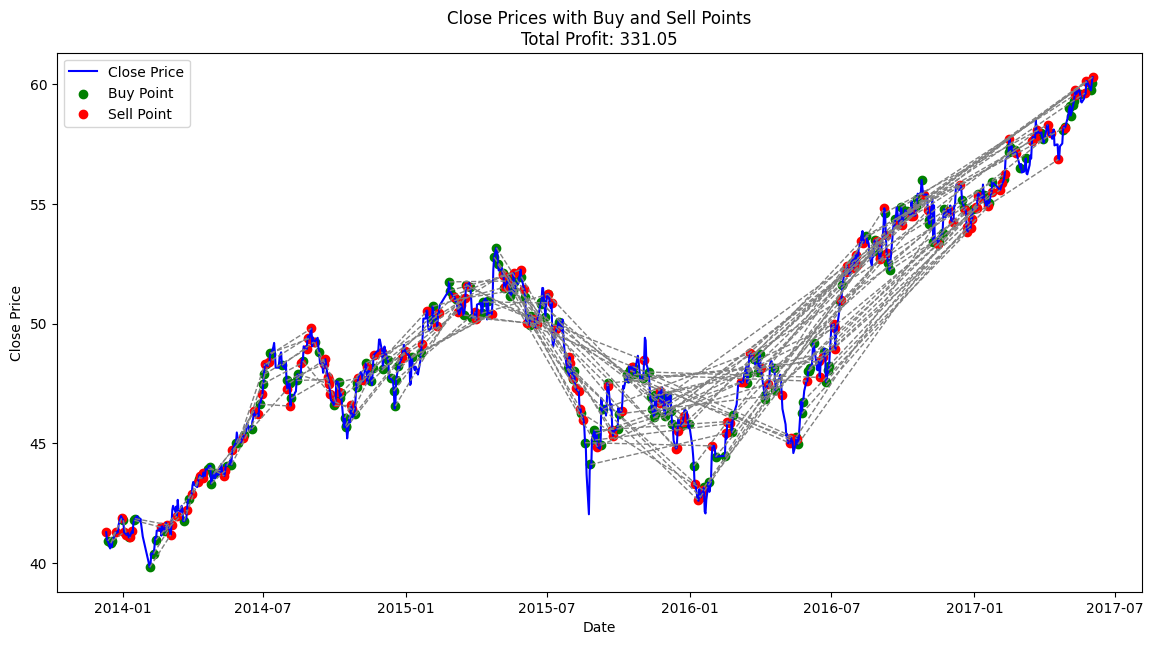

In [263]:
# Plot Buy/Sell Points and Calculate Total Profit
def plot_buy_sell_points_with_profit(df, y_true, y_pred, start_date=None, end_date=None):
    if start_date and end_date:
        df = df.loc[start_date:end_date]
        # Get the integer positions of the start and end dates in the original y_true array
        start_index = df.index[0]
        end_index = df.index[-1]

        # Find the corresponding indices in y_true/y_pred (assuming they align with the original df)
        start_pos = df.index.get_loc(start_index)
        end_pos = df.index.get_loc(end_index) + 1 # +1 to include the end index

        y_true = y_true[start_pos:end_pos] # Use integer positions for slicing
        y_pred = y_pred[start_pos:end_pos] # Use integer positions for slicing

    else:
        df = df.iloc[window_size:len(y_true) + window_size]

    df['True_Label'] = y_true
    df['Predicted_Label'] = y_pred

    buy_points = df[df['Predicted_Label'] == 0].index
    sell_points = df[df['Predicted_Label'] == 2].index

    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.scatter(buy_points, df.loc[buy_points, 'Close'], color='green', label='Buy Point', marker='o')
    plt.scatter(sell_points, df.loc[sell_points, 'Close'], color='red', label='Sell Point', marker='o')

    total_profit = 0
    positions = []
    for index, row in df.iterrows():
        if row['Predicted_Label'] == 0:
            positions.append((index, row['Close']))
        elif row['Predicted_Label'] == 2 and positions:
            buy_index, buy_price = positions.pop(0)
            sell_price = row['Close']
            profit = sell_price - buy_price
            total_profit += profit
            plt.plot([buy_index, index], [buy_price, sell_price], color='gray', linestyle='--', linewidth=1)

    plt.title(f'Close Prices with Buy and Sell Points\nTotal Profit: {total_profit:.2f}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

# Plot the buy/sell points and profit with user-specified dates
plot_buy_sell_points_with_profit(train_df, y_test, y_pred)

## CNN-LSTM more features

In [111]:
from sklearn.metrics import mean_squared_error
from sklearn.utils.class_weight import compute_class_weight

# 選擇需要的特徵與標籤
features = ['Open', 'High', 'Low', 'Close', 'Volume_Thousand_Shares', 'Number_of_Trades', 'Market_Value_Million', 'K', 'D', 'OSC', 'MACD', 'MACD_signal', 'MACD_hist', 'DIF', 'RSI', 'ATR', 'Upper_Band', 'Middle_Band', 'Lower_Band', 'SMA', 'EMA', 'OBV']
X = df[features]

# 將含有逗號的數字字符串轉換為浮點數
for col in features:
    if X[col].dtype == object:
        X[col] = X[col].str.replace(',', '', regex=True).astype(float)

# 替換 NaN 和 Inf 值
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.median(), inplace=True)

X = X.values
y = df['Label'].values

# 標準化輸入資料
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 將資料轉換為 CNN-LSTM 模型需要的 3D 格式 (samples, time_steps, features)
window_size = 9
num_features = len(features)

# 將資料轉換為時間序列的窗口
def create_sequences(data, labels, window_size):
    X_seq, y_seq = [], []
    for i in range(len(data) - window_size):
        X_seq.append(data[i:i + window_size])
        y_seq.append(labels[i + window_size])
    return np.array(X_seq), np.array(y_seq)

# 將資料轉換為序列格式
X_seq, y_seq = create_sequences(X_scaled, y, window_size)

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# 計算類別權重來處理標籤不平衡問題
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# CNN-LSTM 模型結構
model = Sequential()

# CNN 層
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(window_size, num_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# LSTM 層
model.add(LSTM(100, activation='tanh', return_sequences=True, kernel_initializer='glorot_uniform'))
model.add(LSTM(100, activation='tanh', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.3))

# 全連接層
model.add(Dense(100, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))

# 輸出層
model.add(Dense(3, activation='softmax'))  # 3個類別對應標籤 0, 1, 2

# 編譯模型，使用梯度剪裁和降低學習率
optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 訓練模型，使用 Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights_dict, callbacks=[early_stopping])

# 評估模型
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

# 預測測試集
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # 將 softmax 輸出轉換為預測標籤

# 計算 MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

<ipython-input-111-f18538b5f754>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].str.replace(',', '', regex=True).astype(float)
<ipython-input-111-f18538b5f754>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].str.replace(',', '', regex=True).astype(float)
<ipython-input-111-f18538b5f754>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.4251 - loss: 2.1086 - val_accuracy: 0.4056 - val_loss: 2.0125
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4712 - loss: 1.9735 - val_accuracy: 0.3310 - val_loss: 1.9327
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4137 - loss: 1.8921 - val_accuracy: 0.2774 - val_loss: 1.8588
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3558 - loss: 1.8458 - val_accuracy: 0.2471 - val_loss: 1.7943
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3218 - loss: 1.7791 - val_accuracy: 0.2517 - val_loss: 1.7319
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3307 - loss: 1.7410 - val_accuracy: 0.2098 - val_loss: 1.6763
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2878 - loss: 1.6596 - val_accuracy: 0.1888 - val_loss: 1.6247
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2717 - loss: 1.5944 - val_accuracy: 0.

In [117]:
from sklearn.metrics import mean_squared_error
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import LSTM, Dropout, Dense

# 選擇需要的特徵與標籤
features = ['Open', 'High', 'Low', 'Close', 'Volume_Thousand_Shares', 'Number_of_Trades']
X = df[features]

# 將含有逗號的數字字符串轉換為浮點數
for col in features:
    if X[col].dtype == object:
        X[col] = X[col].str.replace(',', '', regex=True).astype(float)

# 替換 NaN 和 Inf 值
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.median(), inplace=True)

X = X.values
y = df['Label'].values

# 標準化輸入資料
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 將資料轉換為 LSTM 模型需要的 3D 格式 (samples, time_steps, features)
window_size = 9
num_features = len(features)

# 將資料轉換為時間序列的窗口
def create_sequences(data, labels, window_size):
    X_seq, y_seq = [], []
    for i in range(len(data) - window_size):
        X_seq.append(data[i:i + window_size])
        y_seq.append(labels[i + window_size])
    return np.array(X_seq), np.array(y_seq)

# 將資料轉換為序列格式
X_seq, y_seq = create_sequences(X_scaled, y, window_size)

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# 計算類別權重來處理標籤不平衡問題
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# LSTM 模型結構
model = Sequential()

# LSTM 層
model.add(LSTM(50, activation='tanh', input_shape=(window_size, num_features)))
model.add(Dropout(0.2))

# 全連接層
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))

# 輸出層
model.add(Dense(3, activation='softmax'))  # 3個類別對應標籤 0, 1, 2

# 編譯模型，使用梯度剪裁和降低學習率
optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 訓練模型，使用 Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights_dict, callbacks=[early_stopping])

# 評估模型
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

# 預測測試集
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # 將 softmax 輸出轉換為預測標籤

# 計算 MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

<ipython-input-117-ed7549fe0961>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].str.replace(',', '', regex=True).astype(float)
<ipython-input-117-ed7549fe0961>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-117-ed7549fe0961>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median()

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.3108 - loss: 1.1010 - val_accuracy: 0.3170 - val_loss: 1.0916
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3180 - loss: 1.1002 - val_accuracy: 0.3147 - val_loss: 1.0921
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3618 - loss: 1.0982 - val_accuracy: 0.3147 - val_loss: 1.0922
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3400 - loss: 1.0785 - val_accuracy: 0.2867 - val_loss: 1.0932
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3090 - loss: 1.1017 - val_accuracy: 0.3007 - val_loss: 1.0955
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3302 - loss: 1.1004 - val_accuracy: 0.3427 - val_loss: 1.0947
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3427 - loss: 1.1088 - val_accuracy: 0.3287 - val_loss: 1.0969
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2830 - loss: 1.1120 - val_accuracy: 0.3287 -

##to do list
* 加入更多feature
* 加入成交量 ✅
* 確認feature正確性

## 查看李宏毅CNN、LSTM
* https://www.youtube.com/watch?v=OP5HcXJg2Aw
* https://www.youtube.com/watch?v=xCGidAeyS4M&t=1048s
* https://www.youtube.com/watch?v=rTqmWlnwz_0